## Python Example
**Our speech signal is sampled at 32 kHz, hence a block of 20 ms has 640 samples. We write a python file with name “lpcexample.py”, with the following content,**

In [1]:
import numpy as np
from sound import *
import matplotlib.pyplot as plt
import scipy.signal as sp
%matplotlib inline

x, fs = wavread('speech8kHz.wav')

('Number of channels: ', 1)
('Number of bytes per sample:', 2)
('Sampling rate: ', 8000)
('Number of samples:', 60246)


* convert to float array type, normalize to -1<x<1:

In [2]:
x = np.array(x,dtype=float)/2**15
print np.size(x)

60246


* Play the audio

In [3]:
sound(2**15*x,fs)

* done


In [4]:
len0 = np.max(np.size(x))

* Prediction error variable initialization

In [5]:
e = np.zeros(np.size(x)) 

* Total number of blocks


In [6]:
blocks = np.int(np.floor(len0/640)) 

* Memory state of prediction filter

In [7]:
state = np.zeros(10)

* Building our Matrix A from blocks of length 640 samples and process:

In [8]:
for m in range(0,blocks):
     A = np.zeros((630,10)) #trick: up to 630 to avoid zeros in the matrix
     for n in range(0,630):
         A[n,:] = x[m*640+n+np.arange(10)]
     
    #Construct our desired target signal d, one sample into thefuture:
     d=x[m*640+np.arange(10,640)];
     #Compute the prediction filter:
     h = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(), A)), A.transpose()), d)
     hperr = np.hstack([1, -np.flipud(h)])
     e[m*640+np.arange(0,640)], state = sp.lfilter(hperr,1,x[m*640+np.arange(0,640)], zi=state)

* The mean-squared error now is:

In [9]:
print "The average squared error is:", np.dot(e.transpose(),e)/np.max(np.size(e))

The average squared error is: 0.000140609024495


### We can see that this is only about $1/4 th$ of the previous pred. Error!

In [10]:
print "Compare that with the mean squared signal power:", np.dot(x.transpose(),x)/np.max(np.size(x))

Compare that with the mean squared signal power: 0.00562754853932


In [11]:
print "The Signal to Error ratio is:", np.dot(x.transpose(),x)/np.dot(e.transpose(),e)

The Signal to Error ratio is: 40.0226696651


* Listen to the prediction error:

In [12]:
sound(2 ** 15 * e, fs)

* done


* Take a look at the signal and it's prediction error

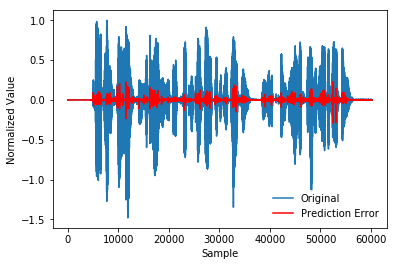

In [13]:
plt.plot(np.divide(x, float(np.max(x))))#np.abs(x)))))
plt.plot(e,'r')
plt.xlabel('Sample')
plt.ylabel('Normalized Value')
plt.legend(('Original','Prediction Error'))

Here it can be seen that the prediction error is even smaller than before.

The **decoder** works the way as shown in the previous example.

**LPC** type **coders** are for instance speech coders, where usually 12 coefficients are used for the prediction, and **transmitted as side information** every 20 ms. The prediction error is parameterized and transmitted as parameters with a very low bit rate. This kind of system is used for instance in most digital **cell phones** systems.